## Print quality control

Basic idea is to detect difference from template. Algorithm is a simple combination of zone cropping with OTSU threshold.


In [1]:
import os
import cv2 as cv
import numpy as np
from inspection.support.utils import extract
from skimage.io import imshow

In [12]:
ORIGINAL = "./inspection/support/um_camera/drawcore.bmp"
MASK = "./inspection/support/ocr/drawcore/100.r22_0.bmp"

extract_meta = {
    "100": [np.array([255, 0, 0], np.uint8), 180, True],  # RGB, rotate 180
    # RGB, rotate 180 (bad text)
    "010": [np.array([0, 255, 0], np.uint8), 180, False],
    "001": [np.array([0, 0, 255], np.uint8), 90, True],  # RGB, rotate 90
}


def get_target_color(filename: str):
    return os.path.basename(filename).split(".")[0]


def get_target_text(filename: str):
    return ".".join(os.path.basename(filename).split(".")[1:-1]).split("_")[0]


TEXT = get_target_text(os.path.basename(MASK))
print(f"'{TEXT}' at image: {ORIGINAL} under mask {MASK}")

'r22' at image: ./inspection/support/um_camera/drawcore.bmp under mask ./inspection/support/ocr/drawcore/100.r22_0.bmp


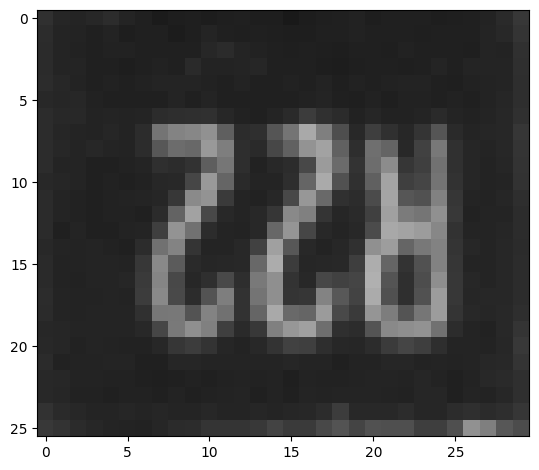

In [7]:
original = cv.cvtColor(
    cv.imread(ORIGINAL),
    cv.COLOR_BGR2GRAY,
)
mask = cv.cvtColor(
    cv.imread(MASK),
    cv.COLOR_BGR2RGB,
)

meta = extract_meta[get_target_color(os.path.basename(MASK))]
chunks, values = extract(original, meta[0], mask)

imshow(chunks[0])

From here it is possible to use XOR to detect % difference from template

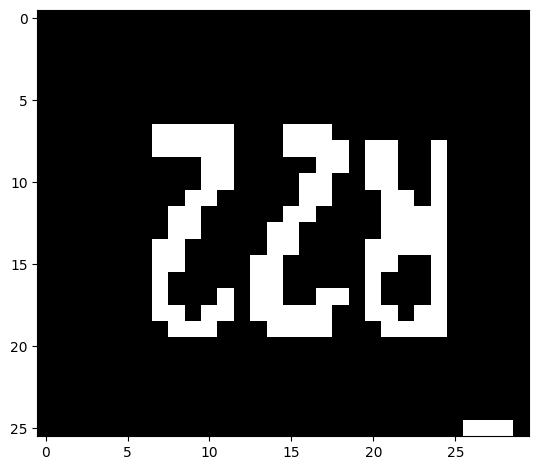

In [11]:
def image_normalization(im: np.ndarray):
    _, im = cv.threshold(im, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)
    return im


im = image_normalization(chunks[0])
imshow(im)